# 1. Load Libraries

In [1]:
from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
import scipy as sc
import pandas as pd
from math import ceil
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, PassiveAggressiveClassifier
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import pandas_profiling as pp
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sompy.sompy import SOMFactory
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
from sklearn.cluster import AgglomerativeClustering
import plotly.express as pe
from plotly.offline import plot
import phik
import sompy
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.impute import KNNImputer
sns.set()
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut

# 2. Import Dataset

In [2]:
#import dataset
df = pd.read_csv('H2.csv')
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 3. Acess Data Quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [4]:
df.describe(include='all').transpose()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [5]:
#Count values of Company column
df['Company'].value_counts()

       NULL    75641
         40      924
         67      267
         45      250
        153      215
               ...  
        282        1
        446        1
        494        1
        481        1
        130        1
Name: Company, Length: 208, dtype: int64

In [6]:
# Replace 'NULL' to NaN 
df = df.replace('NULL',np.NaN, regex=True)

In [7]:
# Check the total missing values in each column
df.isnull().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                           24
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           8131
Company                        75641
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
R

In [8]:
# Select the columns with a "nan" percentage above 50%
#above_na = missing_data[missing_data>=50]
#above_na

## 3.1 Data Transformation

**Company Feature** 

The Company variable shouldn't be deleted because the NaN means that its not a company but a customer (person). The variable is an ID of the company.. so I think we should create another column (binary) for Company with 0-not a company and 1-is a company. I don't the ID of it its relevant for the prediction

In [9]:
df['Company'].value_counts()

         40    924
         67    267
         45    250
        153    215
        219    141
              ... 
        282      1
        446      1
        494      1
        481      1
        130      1
Name: Company, Length: 207, dtype: int64

In [10]:
df['Company'].loc[df['Company'].isnull()] = 0


In [11]:
df['Company'].loc[df['Company'] !=0 ] = 1 


**Variables with High Cardinality**
1. Country
2. Agent - ID of the travel agency
3. ReservationStatusDate

## 3.2 Missing Values

Deletion of the rows that have missing values - Children and Country because the ratio of the undefined data of the feature is very small, which is below 0.5% so that it does not delete a lot of data.

In [12]:
# Percentage of missing values in each column
missing_data=df.isna().sum()/len(df)*100.00
missing_data

IsCanceled                      0.000000
LeadTime                        0.000000
ArrivalDateYear                 0.000000
ArrivalDateMonth                0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.005042
Babies                          0.000000
Meal                            0.000000
Country                         0.030253
MarketSegment                   0.000000
DistributionChannel             0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
ReservedRoomType                0.000000
AssignedRoomType                0.000000
BookingChanges                  0.000000
DepositType                     0.000000
Agent                          10.249590
Company                         0.000000
DaysInWaitingLis

In [13]:
df = df[df['Children'].notna()]

In [14]:
df = df[df['Country'].notna()]

In [15]:
#Fill missing values with mode
df['Agent'] = df['Agent'].fillna(df['Agent'].mode().loc[0])

In [16]:
#prof = df.profile_report()
#prof.to_file(output_file='output.html')

# Data partition

In [17]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [18]:
#Define metric and non-metric features list 
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber',
                       'ArrivalDateDayOfMonth','Meal', 'Country', 'MarketSegment', 'DistributionChannel',
                       'IsRepeatedGuest','ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 
                       'CustomerType', 'ReservationStatus', 'ReservationStatusDate','Company']


#non_metric_features = ['Agent', 'ArrivalDateMonth','AssignedRoomType','Company','Country','CustomerType','DepositType','DistributionChannel','IsCanceled',
                      #'IsRepeatedGuest', 'MarketSegment','Meal','ReservationStatus','ReservedRoomType', 'TotalOfSpecialRequests']
metric_features = df.columns.drop(non_metric_features).to_list()


## Numeric Features

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 1

findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925
findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Hatran' (NotoSansHatran-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Noto Sans Sora Sompeng' (NotoSansSoraSompeng-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Old 

findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Adlam' (NotoSansAdlam-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Mende Kikakui' (NotoSansMendeKikakui-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegra

findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Warang Citi' (NotoSansWarangCiti-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Psalter Pahlavi' (NotoSansPsalterPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Takri' (NotoSansTakri-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 

findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05
findfont: sc

findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Miao' (NotoSansMiao-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc)

findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font '.SF Compact' (SFCompact.ttf) normal normal 1000 normal>) = 10.62
findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Palmyrene' (NotoSansPalmyrene-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 con

findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Cuneiform' (NotoSansCuneiform-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) =

findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Modi' (NotoSansModi-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Mro' (NotoSansMro-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sana' (Sana.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Apple Braille' (Apple Braille P

findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Mandaic' (NotoSansMandaic-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Arial ('/System/Library/Fonts/Supplemental/Arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.

findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Hanifi Rohingya' (NotoSansHanifiRohingya-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335
findfont

findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Bhaiksuki' (NotoSansBhaiksuki-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Adlam' (NotoSansAdlam-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Av

findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Warang Citi' (NotoSansWarangCiti-Regular.ttf

findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43
findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kohinoor Bang

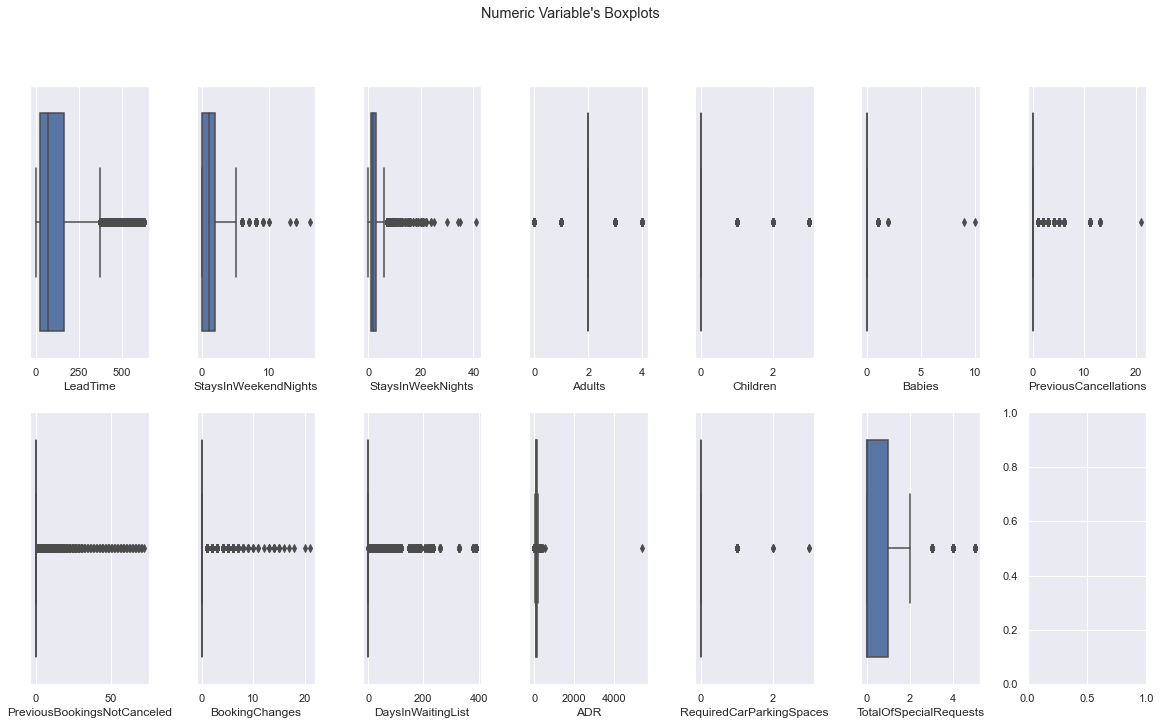

In [19]:
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data 

# Iterate across axes objects and associate each box plot: 

for ax, feat in zip(axes.flatten(), metric_features): 

    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:

title = "Numeric Variable's Boxplots"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)
 
plt.show()

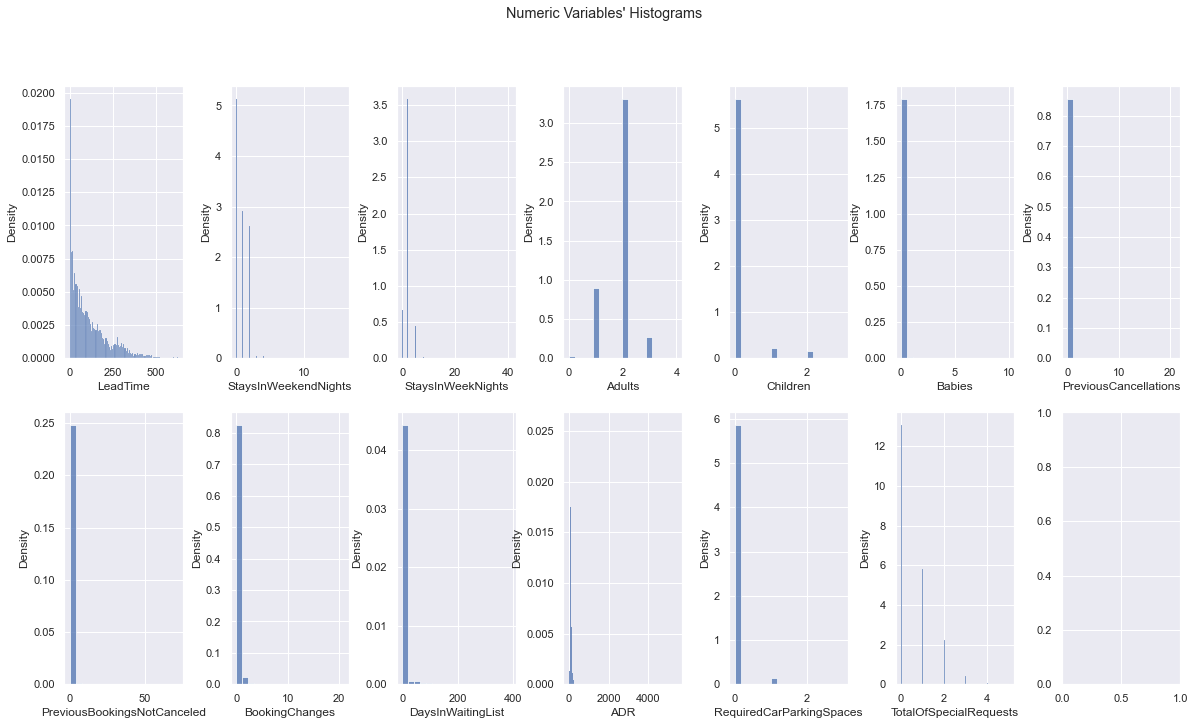

In [20]:
# All Numeric Variables' Box Plots in one figure
sns.set()
 
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
 
# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat],  stat='density', common_norm=False, ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)
 
plt.show()

In [21]:
# # All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
# sns.set()

# features = non_metric_features 
# # Prepare figure. Create individual axes where each bar plot will be placed
# fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# # Plot data
# # Iterate across axes objects and associate each bar plot:
# for ax, feat in zip(axes.flatten(), features):
#     sns.countplot(x=df[feat], ax=ax)

# title = "Categorical"
# plt.suptitle(title)
# # Rotating X-axis labels
# axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
# axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
# plt.subplots_adjust(wspace=0.3, hspace=0.7)

# plt.show()

## Categorical Features

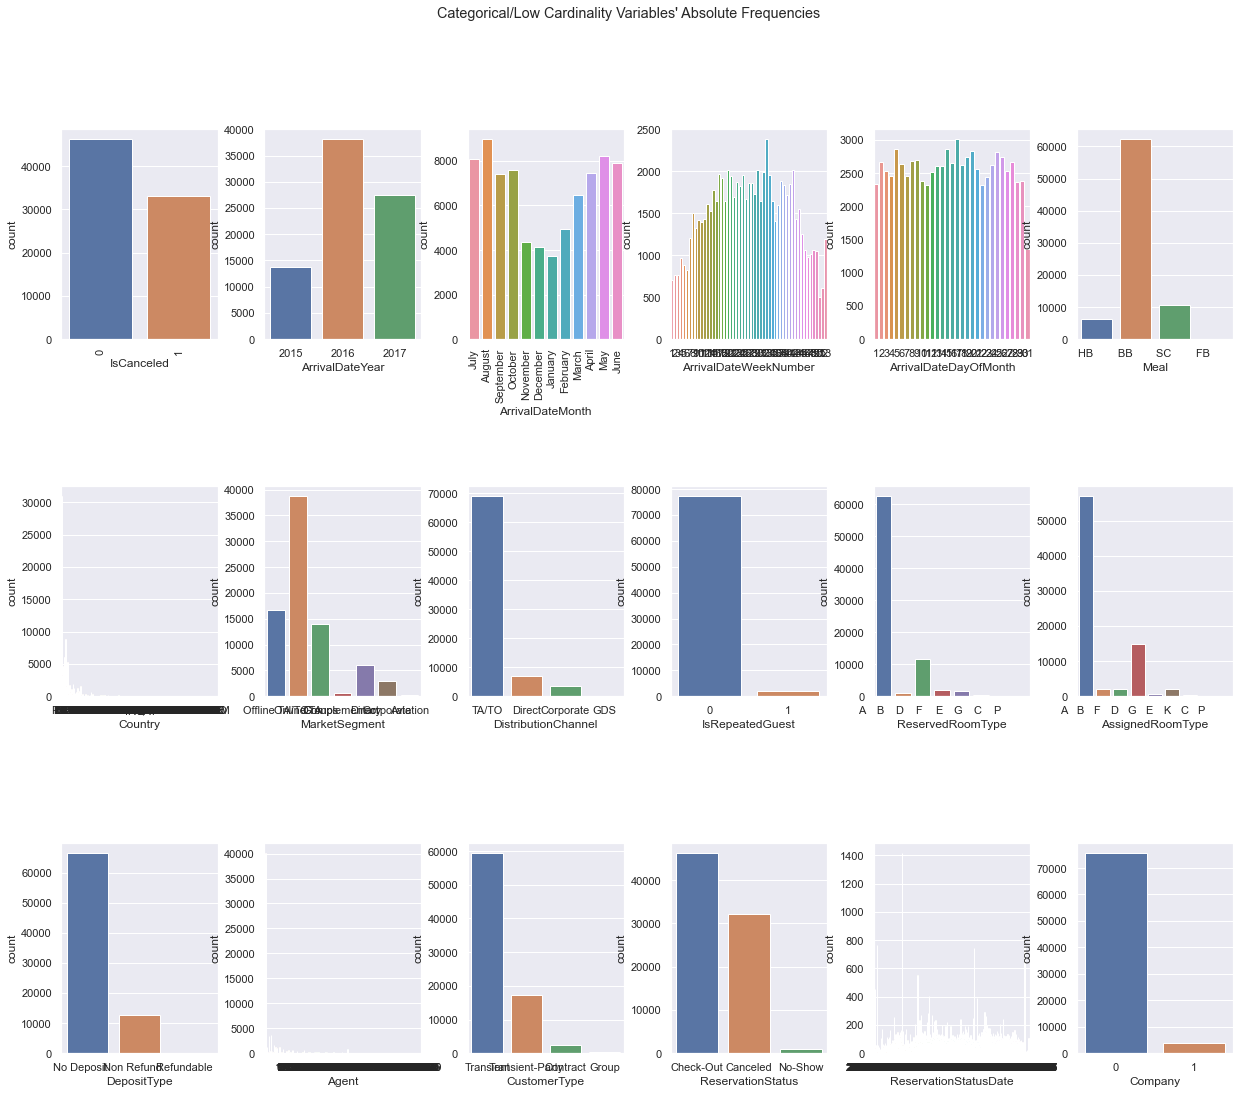

In [22]:
# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features 
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

# Feature Engineering

**IsRoomNotEqual**


Create a variable to distinguish if the type of room reserved is the same from the reservation to the assignement (at the hotel)

In [23]:
df['IsRoomNotEqual'] = df['ReservedRoomType'] != df['AssignedRoomType']

In [24]:
df['IsRoomNotEqual'].value_counts()

False    72110
True      7192
Name: IsRoomNotEqual, dtype: int64

In [25]:
df.drop(columns=['ReservedRoomType','AssignedRoomType'], inplace=True)

**IsCanceled**

The predicted variable.

In [26]:
is_cancelled = df['IsCanceled']

**DepositType** is dropped - this variable was extracted in a wrong way and its quality was compromised

In [27]:
df.drop(columns=['DepositType'], inplace=True)

**LeadTime**

In [28]:
Lead_time = df['LeadTime']

### One Hot Encoder

1. Meal
2. MarketSegment
3. DistributionChannel
4. CustomerType

In [29]:
# Define a function to convert given fields into boolean column based on grouping unique values and drop former column
def set_values_as_column(field, df = df):
    for item in df[field].value_counts().index:
        df[item] = df[field].apply(lambda x: 1 if x == item else 0)
    del df[field]

**Enconded Variables**

In [30]:
#set_values_as_column('ArrivalDateMonth')
set_values_as_column('Meal')
set_values_as_column('MarketSegment')
set_values_as_column('DistributionChannel')
#set_values_as_column('Agent')
set_values_as_column('CustomerType')

Combine the variables **StaysInweekendNights** with **StaysinWeekNights** into one feature namely **StayinNight** adding these features together.

In [31]:
df['StayinNight'] = df['StaysInWeekendNights'] + df['StaysInWeekNights']

In [32]:
df = df.drop(columns=['StaysInWeekendNights','StaysInWeekNights'],axis=1)

**Variables** - Are no-metric features

In [33]:
variables = [item for item in list(df.columns) if item not in metric_features]

In [34]:
variables.remove('IsCanceled')
variables.remove('ReservationStatusDate')
variables.remove('Country')

In [35]:
metric_features

['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

In [36]:
del metric_features[1]

In [37]:
del metric_features[1]

In [38]:
metric_features

['LeadTime',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

In [39]:
metric_features.append('StayinNight')

Delete the variable StayinNight of variables (non_metric features) list

In [40]:
del variables[-1]

# Outliers

In [41]:
# Finding Outliers using IQR method
def outlier_remove(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [42]:
#df[metric_features] = outlier_remove(df[metric_features])

## Normalization

In [43]:
scaler = StandardScaler().fit(df[metric_features])
normalized_df = scaler.transform(df[metric_features])
normalized_df = pd.DataFrame(normalized_df, columns=metric_features)

In [44]:
normalized_df

,LeadTime,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,StayinNight
0,-0.934996,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-2.416280,-0.157315,-0.700582,-0.525233
1,-0.195941,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,0.580107,0.548605
2,-0.403237,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.856302,-0.157315,0.580107,0.548605
3,-0.159890,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,1.860795,1.622444
4,-0.087787,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,0.580107,-0.525233
...,...,...,...,...,...,...,...,...,...,...,...,...
79297,-0.781777,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.210746,-0.157315,-0.700582,2.159363
79298,-0.069761,2.257078,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,2.755279,-0.157315,1.860795,2.159363
79299,-0.682636,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,1.201724,-0.157315,4.422173,2.159363
79300,-0.006671,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.021254,-0.157315,-0.700582,2.159363


In [45]:
df = pd.concat([df[variables], normalized_df], axis=1)

In [46]:
df

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,IsRepeatedGuest,Agent,Company,ReservationStatus,IsRoomNotEqual,BB,...,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,StayinNight
0,2015.0,July,27.0,1.0,0.0,6,0,Check-Out,False,0.0,...,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-2.416280,-0.157315,-0.700582,-0.525233
1,2015.0,July,27.0,1.0,0.0,9,0,Canceled,False,1.0,...,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,0.580107,0.548605
2,2015.0,July,27.0,1.0,0.0,9,0,Canceled,False,1.0,...,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.856302,-0.157315,0.580107,0.548605
3,2015.0,July,27.0,1.0,0.0,9,0,Canceled,False,1.0,...,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,1.860795,1.622444
4,2015.0,July,27.0,2.0,0.0,9,0,Canceled,False,1.0,...,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,-0.661304,-0.157315,0.580107,-0.525233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,2017.0,August,35.0,30.0,0.0,394,0,Check-Out,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79326,2017.0,August,35.0,31.0,0.0,9,0,Check-Out,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79327,2017.0,August,35.0,31.0,0.0,9,0,Check-Out,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79328,2017.0,August,35.0,31.0,0.0,89,0,Check-Out,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlations
## Metric Features

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8ed8445820>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8ed8445820> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


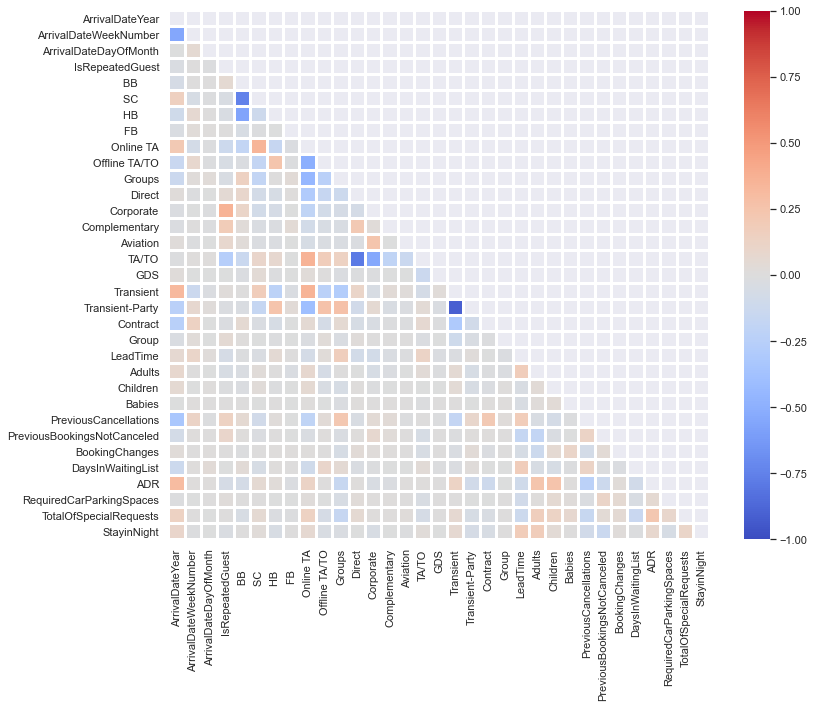

In [47]:
plt.rcParams['figure.figsize'] = (12,10)

corr_matrix=df.corr(method = 'spearman')
mask=np.zeros_like(corr_matrix, dtype=np.bool)

mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=corr_matrix, mask=mask, center=0, annot=False, linewidths=2, cmap='coolwarm',vmin=-1, vmax=1)
plt.tight_layout()

## Non-Metric Features

interval columns not set, guessing: ['ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'IsRepeatedGuest', 'BB       ', 'SC       ', 'HB       ', 'FB       ', 'Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'TA/TO', 'GDS', 'Transient', 'Transient-Party', 'Contract', 'Group']


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8edc86f2e0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8edc86f2e0> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol

findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Hanifi Rohingya' (NotoSansHanifiRohingya-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925
findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sa

findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Adlam' (NotoSansAdlam-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Mende Kikakui' (NotoSansMendeKikakui-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
f

findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Warang Citi' (NotoSansWarangCiti-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Psalter Pahlavi' (NotoSansPsalterPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Marke

findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05
findfont: sco

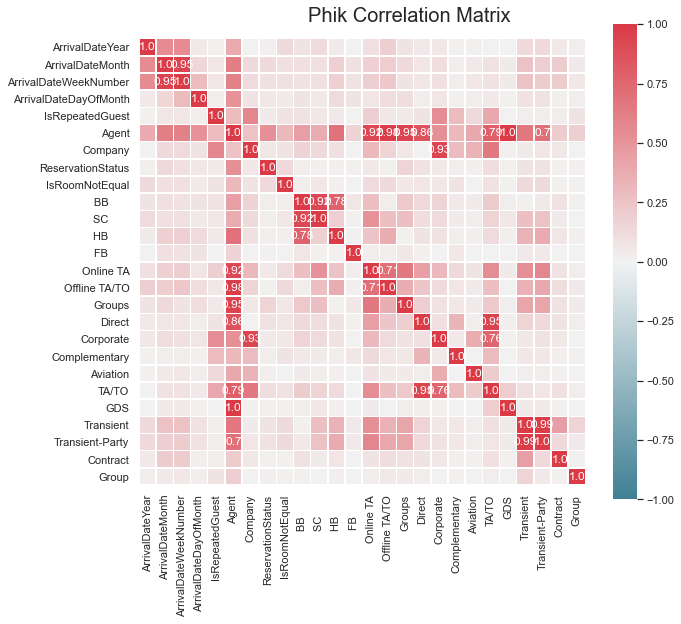

In [48]:
# Prepare figure 
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
phik_corr = np.round(df[variables].phik_matrix(), decimals=2)

# Build annotation matrix (values above |0.8| will appear annotated in the plot)
mask_annot = np.absolute(phik_corr.values) >= 0.7
annot = np.where(mask_annot, phik_corr.values, np.full(phik_corr.shape,""))


# Plot heatmap of the correlation matrix
sns.heatmap(data=phik_corr,annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
           fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Phik Correlation Matrix", fontsize=20)


plt.show()

# Dataset Partition

In [49]:
X = normalized_df
y = is_cancelled

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.25,random_state=40)

# Features Importances

In [51]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [52]:
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.Series(reg.coef_, index=X_train.columns)
coef.sort_values()

TotalOfSpecialRequests        -0.123784
BookingChanges                -0.055158
RequiredCarParkingSpaces      -0.040371
PreviousBookingsNotCanceled   -0.030422
DaysInWaitingList             -0.003177
Children                       0.000000
Babies                         0.000834
Adults                         0.011424
StayinNight                    0.024119
ADR                            0.034368
PreviousCancellations          0.069180
LeadTime                       0.123627
dtype: float64

In [53]:
ridge = RidgeCV()
ridge.fit(X=X_train, y=y_train)
coef_ridge = pd.Series(ridge.coef_, index=X_train.columns)
print(coef_ridge.sort_values())

TotalOfSpecialRequests        -0.125750
BookingChanges                -0.056755
RequiredCarParkingSpaces      -0.041695
PreviousBookingsNotCanceled   -0.032356
DaysInWaitingList             -0.005232
Children                       0.001003
Babies                         0.002887
Adults                         0.012364
StayinNight                    0.025735
ADR                            0.035894
PreviousCancellations          0.071532
LeadTime                       0.124959
dtype: float64


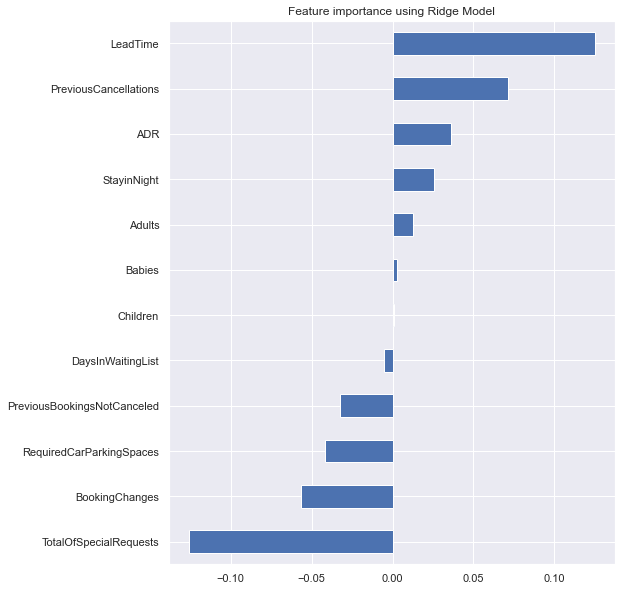

In [54]:
plot_importance(coef_ridge,'Ridge')

In [55]:
mse_importance = DecisionTreeRegressor().fit(X_train, y_train).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(X_train, y_train).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(X_train, y_train).feature_importances_

KeyboardInterrupt: 

In [ ]:
import seaborn as sns

zippy = pd.DataFrame(zip(mse_importance, mae_importance, friedman_importance), columns = ['mse','mae','friedman'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

# Variables Selection

In [ ]:
x = X[['LeadTime','ADR','TotalOfSpecialRequests','StayinNight','PreviousCancellations',
         'BookingChanges','Adults','DaysInWaitingList','Children','PreviousBookingsNotCanceled','RequiredCarParkingSpaces',
        'Babies' ]]

# Visualization

1. **LeadTime** and **IsCancelled**

In [ ]:
data_1 = pd.concat([is_cancelled,Lead_time], axis=1)
data_1

In [ ]:
data_1 = data_1[data_1['IsCanceled']==1]
data_1

In [ ]:
bins = [0,100,200,300,400,500,600, 700]
df = data_1['LeadTime'].groupby(pd.cut(data_1['LeadTime'], bins=bins)).count()
df.plot(kind='bar', ylabel = 'Number of Cancellations', xlabel= 'Lead Time (Number of days)')

In [ ]:
x

# Prediction

## Models: LogisticRegression, Decision Tree and Random Forest

In [63]:
X_train, X_val, y_train, y_val = train_test_split(x, 
                                                  y, 
                                                  test_size = 0.2, 
                                                  random_state=5, 
                                                  stratify = y)

## Logistic Regression with Hould-Out Partition

In [64]:
log_model = LogisticRegression()

In [65]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [66]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [67]:
labels_train = log_model.predict(X_train)
labels_val = log_model.predict(X_val)

In [68]:

metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     36980
           1       0.72      0.58      0.64     26461

    accuracy                           0.73     63441
   macro avg       0.73      0.71      0.71     63441
weighted avg       0.73      0.73      0.73     63441

[[31099  5881]
 [11144 15317]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

## Logistic Regression and Decision Tree with 10-Fold 

In [69]:
# DO IT
y_pred = log_model.predict(X_val)

In [70]:
def run_model_LR(X,y):
    model = LogisticRegression().fit(X,y)
    return model

In [71]:
def evaluate_model(X,y, model):
    return model.score(X,y)

In [72]:
def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_LR(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [73]:
kf = KFold(n_splits=10, shuffle = True, random_state = 15 )
kf

KFold(n_splits=10, random_state=15, shuffle=True)

In [74]:
avg_score_LR(kf, X_train, y_train)

Train: 0.7317997996565846
Test: 0.7313566724004463


In [75]:
def run_model_DT(X,y):
    model = DecisionTreeClassifier().fit(X,y)
    return model

In [76]:
def avg_score_DT(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_DT(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [77]:
avg_score_DT(kf,X_train,y_train)

Train: 0.9825367053317468
Test: 0.799672103820168


## Logistic Regression and Decision Tree with Repeated 10-Fold

In [78]:
rkf = RepeatedKFold(n_splits=6, n_repeats=2)

In [79]:
avg_score_LR(rkf, X_train, y_train)

Train: 0.7315442720337514
Test: 0.7314198369020358


In [80]:
avg_score_DT(rkf,X_train,y_train)

Train: 0.9830015291868697
Test: 0.7978515127396629


## Random Forest with random_state=5

In [81]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state = 5)

In [82]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [83]:
modelRF.score(X_val, y_val)

0.8327974276527331

In [84]:
RF=RandomForestClassifier(random_state=5).fit(X=X_train, y=y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val, y_val))

0.9818413959426869
0.8327974276527331


## Random Forest with random_state=5 and n_estimators = 300

In [85]:
modelRF_300trees = RandomForestClassifier(n_estimators = 300, random_state = 5)

In [86]:
modelRF_300trees.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=5)

In [87]:
modelRF_300trees.score(X_val, y_val)

0.8341844776495807

In [88]:
RF=RandomForestClassifier(random_state=5,n_estimators=300).fit(X=X_train, y=y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val, y_val))

0.9818886839740861
0.8341844776495807


## Random Forest with max_features = 5 and random_state = 5

In [89]:
modelRF_maxf = RandomForestClassifier(max_features = 5, random_state = 5)

In [90]:
modelRF_maxf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, random_state=5)

In [91]:
modelRF_maxf.score(X_val, y_val)

0.8346888594666162

In [92]:
RF=RandomForestClassifier(random_state=5,max_features=5).fit(X=X_train, y=y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val, y_val))

0.98185715861982
0.8346888594666162


## Random Forest with bootstrap = False and random_state = 5

In [93]:
modelRF_b = RandomForestClassifier(bootstrap = False, random_state = 5)

In [94]:
modelRF_b.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, random_state=5)

In [95]:
modelRF_b.score(X_val, y_val)

0.826870941302566

In [96]:
RF=RandomForestClassifier(random_state=5,bootstrap=False).fit(X=X_train, y=y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val, y_val))

0.9818886839740861
0.826870941302566


In [97]:
'''import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

plt.figure(figsize=(15,8))
score = [modelRF.score(X_val, y_val),modelRF_300trees.score(X_val, y_val), modelRF_maxf.score(X_val, y_val),modelRF_b.score(X_val, y_val)]
models = ['RF', 'RF_300', 'RF_maxf','RF_b']
data_tuples = list(zip(models,score))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.xticks(color='green')
plt.yticks(color='green')
plt.ylim(0,1)
plt.show()'''

"import matplotlib.pyplot as plt\nimport seaborn as sns; sns.set(font_scale=1.2)\n%matplotlib inline\n\nplt.figure(figsize=(15,8))\nscore = [modelRF.score(X_val, y_val),modelRF_300trees.score(X_val, y_val), modelRF_maxf.score(X_val, y_val),modelRF_b.score(X_val, y_val)]\nmodels = ['RF', 'RF_300', 'RF_maxf','RF_b']\ndata_tuples = list(zip(models,score))\ndata = pd.DataFrame(data_tuples)\ndata = data.sort_values(1)\nplt.bar(data[0], data[1])\nplt.xticks(color='green')\nplt.yticks(color='green')\nplt.ylim(0,1)\nplt.show()"

## Random Forest with best_params

In [98]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=15)

rf_parameters = {"n_estimators": np.arange(100, 400, 100),
                  "max_features": ['sqrt', 'log2', 'auto', None],
                  "criterion": ['gini', 'entropy'],
                  "warm_start" : [True, False]}

rf_grid = GridSearchCV(estimator=rf_clf, param_grid=rf_parameters, scoring='accuracy', verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)
rf_grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.1min finished


{'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 300,
 'warm_start': True}

In [100]:
RF=RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', n_estimators = 300, warm_start = True).fit(X=X_train, y=y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val, y_val))

0.9818886839740861
0.8341214299224513
